In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from textblob import TextBlob
from collections import Counter
import re

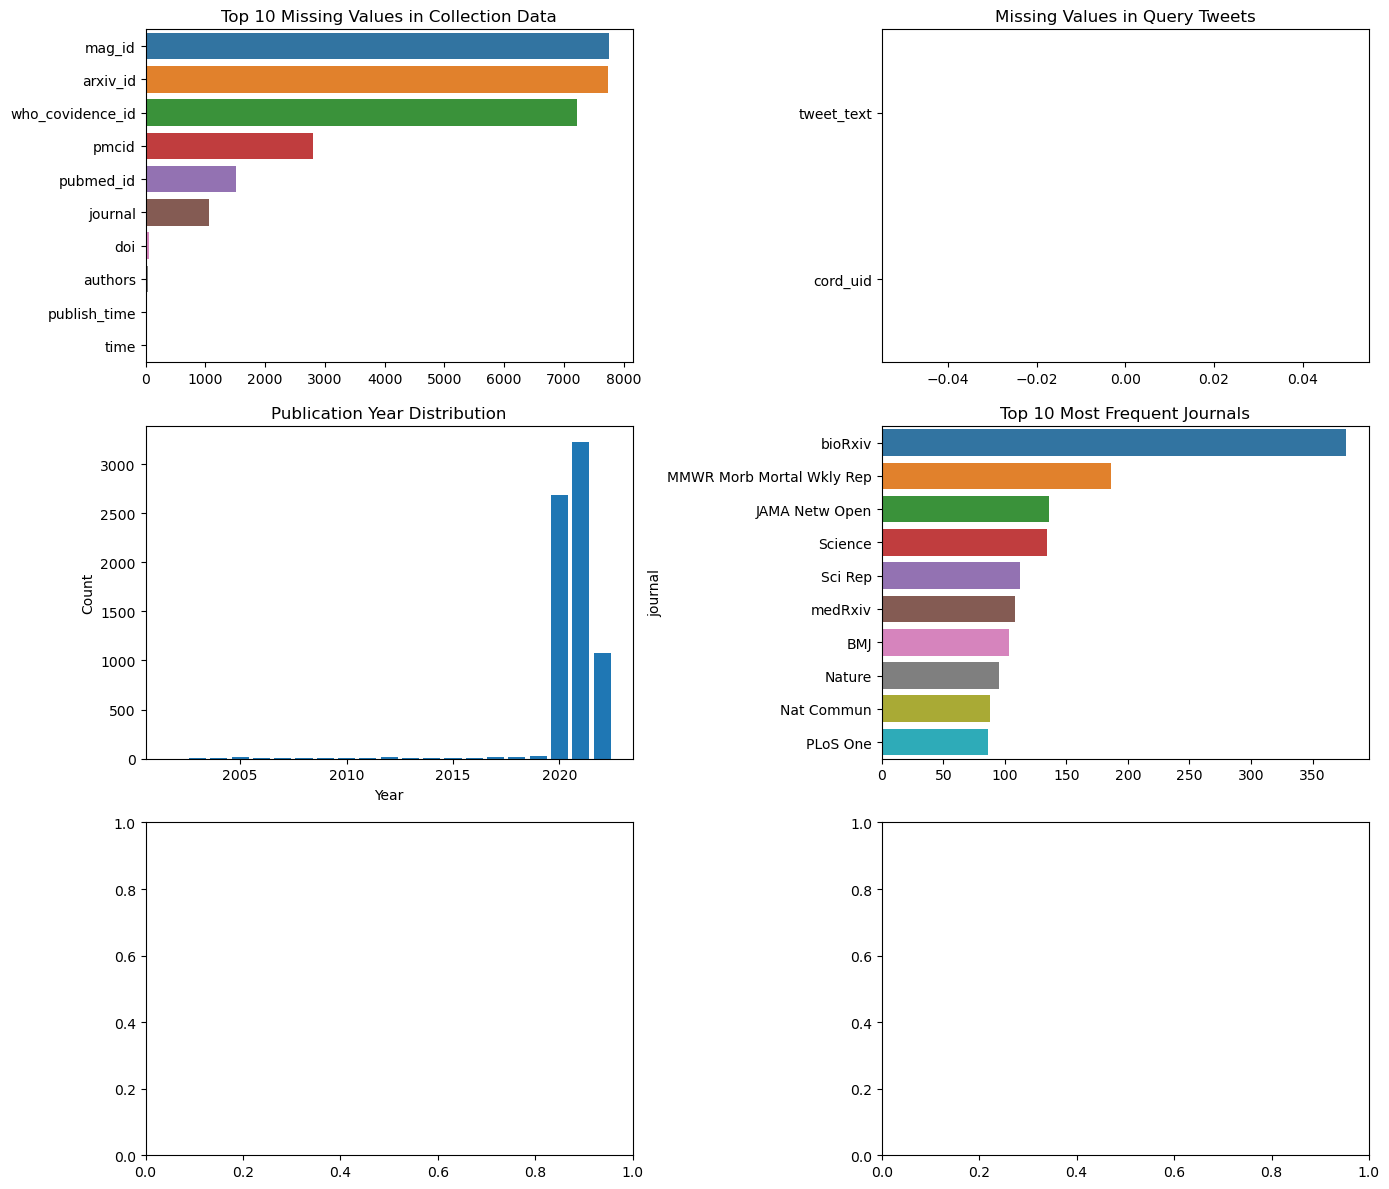

{'Missing Data in Collection': {'mag_id': 7764,
  'arxiv_id': 7744,
  'who_covidence_id': 7215,
  'pmcid': 2801,
  'pubmed_id': 1507,
  'journal': 1060,
  'doi': 58,
  'authors': 44,
  'publish_time': 3,
  'time': 3,
  'label': 0,
  'cord_uid': 0,
  'source_x': 0,
  'abstract': 0,
  'license': 0,
  'title': 0,
  'timet': 0},
 'Missing Data in Query Tweets': {'tweet_text': 0, 'cord_uid': 0},
 'Duplicate Cord UIDs in Collection': 46,
 'Top 10 Most Cited Papers in Tweets': {'t4y1ylb3': 78,
  '9pb2eqoa': 62,
  'gw9hkw00': 59,
  'ef3warsh': 57,
  'ximw03ej': 54,
  'dgnddq80': 50,
  '1l4o9pko': 44,
  'yj3yisum': 39,
  'mkgszhkk': 36,
  'g17lp8ch': 34}}

In [58]:
#Initial data analysis

#Load datasets
collection_data = pd.read_pickle('subtask4b_collection_data.pkl')
query_tweets = pd.read_csv('subtask4b_query_tweets.tsv', sep='\t')

#Missing data analysis
missing_collection = collection_data.isnull().sum().sort_values(ascending=False)
missing_query_tweets = query_tweets.isnull().sum()

#Duplicate literatrue id analysis
duplicate_cord_uids = collection_data.duplicated(subset=['cord_uid']).sum()

#Publication date distribution analysis
collection_data['publish_time'] = pd.to_datetime(collection_data['publish_time'], errors='coerce')
publish_time_counts = collection_data['publish_time'].dt.year.value_counts().sort_index()

#Jounral frequency analysis
top_journals = collection_data['journal'].value_counts().head(10)

#Tweet-Paper connection analysis
tweet_paper_counts = query_tweets['cord_uid'].value_counts().head(10)

#Visualization
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

#Missing data
sns.barplot(y=missing_collection[:10].index, x=missing_collection[:10].values, ax=axs[0, 0])
axs[0, 0].set_title("Top 10 Missing Values in Collection Data")

sns.barplot(y=missing_query_tweets.index, x=missing_query_tweets.values, ax=axs[0, 1])
axs[0, 1].set_title("Missing Values in Query Tweets")

#Publication date distribution
axs[1, 0].bar(publish_time_counts.index, publish_time_counts.values)
axs[1, 0].set_title("Publication Year Distribution")
axs[1, 0].set_xlabel("Year")
axs[1, 0].set_ylabel("Count")

#Most frequent journals in dataset
sns.barplot(y=top_journals.index, x=top_journals.values, ax=axs[1, 1])
axs[1, 1].set_title("Top 10 Most Frequent Journals")

plt.tight_layout()
plt.show()

# Displaying visual analysis
{
    "Missing Data in Collection": missing_collection.to_dict(),
    "Missing Data in Query Tweets": missing_query_tweets.to_dict(),
    "Duplicate Cord UIDs in Collection": duplicate_cord_uids,
    "Top 10 Most Cited Papers in Tweets": tweet_paper_counts.to_dict()
}

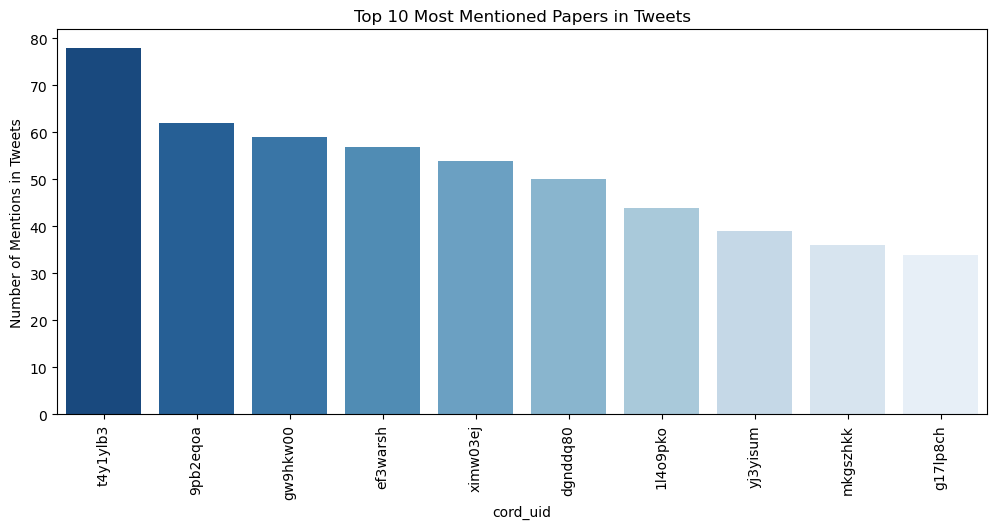

cord_uid
t4y1ylb3    78
9pb2eqoa    62
gw9hkw00    59
ef3warsh    57
ximw03ej    54
dgnddq80    50
1l4o9pko    44
yj3yisum    39
mkgszhkk    36
g17lp8ch    34
Name: count, dtype: int64

In [64]:
#Most mentioned papers in tweets by cord_uid

#Recalculate the most mentioned research papers in tweets
cord_uid_counts = query_tweets["cord_uid"].value_counts()

#Get the top 10 most mentioned papers
top_10_papers = cord_uid_counts.head(10)

#Plot top 10 most mentioned papers in tweets
plt.figure(figsize=(12, 5))
sns.barplot(x=top_10_papers.index, y=top_10_papers.values, palette="Blues_r")
plt.xticks(rotation=90)
plt.xlabel("cord_uid")
plt.ylabel("Number of Mentions in Tweets")
plt.title("Top 10 Most Mentioned Papers in Tweets")
plt.show()

#Display the top 10 most mentioned research papers and the number of times referenced in tweets
top_10_papers

C:\Users\shuyu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


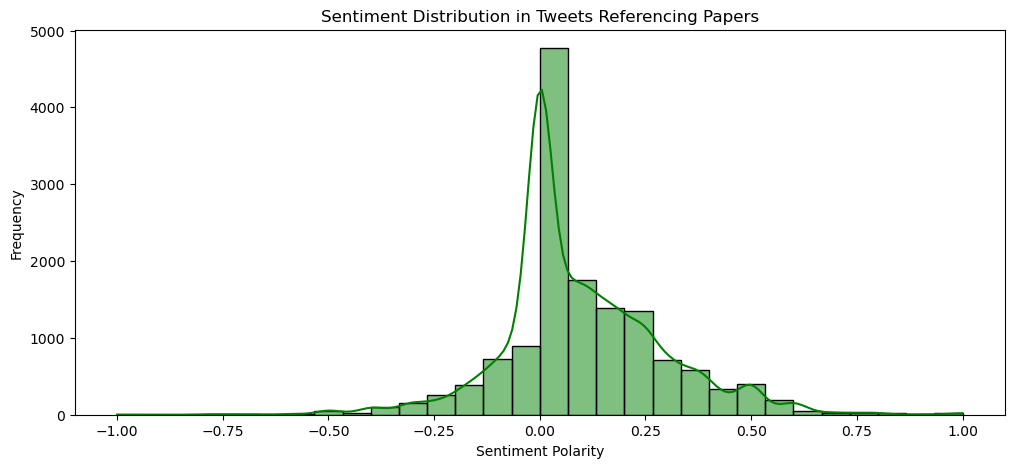

{'Average Sentiment': 0.09558824688337174,
 'Median Sentiment': 0.05,
 'Max Sentiment': 1.0,
 'Min Sentiment': -1.0}

In [67]:
#Compute sentiment polarity for tweets using textblob's sentiment polarity functionality
query_tweets["sentiment"] = query_tweets["tweet_text"].apply(lambda x: TextBlob(x).sentiment.polarity)

#Plot sentiment polarity distribution
plt.figure(figsize=(12, 5))
sns.histplot(query_tweets["sentiment"], bins=30, kde=True, color="green")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.title("Sentiment Distribution in Tweets Referencing Papers")
plt.show()

#Sentiment polarity distribution stats?
sentiment_stats = {
    "Average Sentiment": np.mean(query_tweets["sentiment"]),
    "Median Sentiment": np.median(query_tweets["sentiment"]),
    "Max Sentiment": np.max(query_tweets["sentiment"]),
    "Min Sentiment": np.min(query_tweets["sentiment"]),
}

sentiment_stats

In [73]:
#Analysis of most common and least common words in tweets

#Function to clean and tokenize text
def tokenize_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    tokens = text.split()  # Tokenize
    return tokens

#Tokenizing all tweets
all_tokens = []
for tweet in query_tweets['tweet_text'].dropna():
    all_tokens.extend(tokenize_text(tweet))

#Get word count frequency
word_counts = Counter(all_tokens)

#Get most mentioned and least mentioned words
most_common_words = word_counts.most_common(10)  # Top 10 most frequent words
least_common_words = [word for word, count in word_counts.items() if count == 1][:10]  # Words that appear only once

{
    "Most Common Words": most_common_words,
    "Least Common Words": least_common_words
}

{'Most Common Words': [('the', 14285),
  ('of', 13752),
  ('in', 10869),
  ('and', 8819),
  ('to', 8541),
  ('a', 7668),
  ('covid19', 5677),
  ('with', 4769),
  ('is', 4233),
  ('that', 3924)],
 'Least Common Words': ['hospitalassociated',
  'blacklatinoindigenous',
  'xi',
  'jinping',
  'arbitrarily',
  'qchat',
  'checkups',
  'covidstrain',
  'strainsspread',
  'criticizing']}